In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

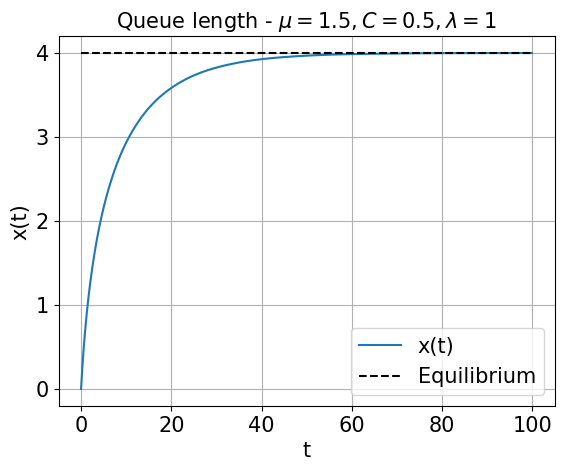

In [22]:
C = 1/2
MU = 1.5
LMBD = 1

stationary_point = LMBD / (C * (MU - LMBD))

def f(t, y):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -MU * C * y / (1 + C * y) + LMBD

y0 = [0]           # initial value y0=y(t0)
t0 = 0             # integration limits for t: start at t0=0
tf = 100             # and finish at tf=10
delta = 0.1
t_eval = np.arange(t0, tf, delta)

sol = solve_ivp(fun=f, t_span=[t0, tf], y0=y0, t_eval=t_eval)  # computation of Solution 

plt.plot(sol.t, sol.y[0], label='x(t)')
plt.plot(sol.t, np.ones_like(sol.t) * stationary_point, 'k--', label='Equilibrium')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Queue length - $\mu=' + str(MU) + f', C={C}, \\lambda={LMBD}$')
plt.savefig('figures/example_trajectory.png')